
Epoch 1
Input: [ 0  0 -1], Target: -1, Output: 0.0, Error: -1.0, Updated Weights: [0.0 0.0 0.1]
Input: [ 0  1 -1], Target: -1, Output: -0.1, Error: -0.9, Updated Weights: [ 0.0 -0.1  0.2]
Input: [ 1  0 -1], Target: -1, Output: -0.2, Error: -0.8, Updated Weights: [-0.1 -0.1  0.3]
Input: [ 1  1 -1], Target: 1, Output: -0.4, Error: 1.4, Updated Weights: [0.1 0.1 0.1]

Epoch 2
Input: [ 0  0 -1], Target: -1, Output: -0.1, Error: -0.9, Updated Weights: [0.1 0.1 0.2]
Input: [ 0  1 -1], Target: -1, Output: -0.2, Error: -0.8, Updated Weights: [ 0.1 -0.0  0.3]
Input: [ 1  0 -1], Target: -1, Output: -0.2, Error: -0.8, Updated Weights: [-0.0 -0.0  0.4]
Input: [ 1  1 -1], Target: 1, Output: -0.4, Error: 1.4, Updated Weights: [0.1 0.1 0.2]

Epoch 3
Input: [ 0  0 -1], Target: -1, Output: -0.2, Error: -0.8, Updated Weights: [0.1 0.1 0.3]
Input: [ 0  1 -1], Target: -1, Output: -0.2, Error: -0.8, Updated Weights: [0.1 0.0 0.4]
Input: [ 1  0 -1], Target: -1, Output: -0.3, Error: -0.7, Updated Weights: [

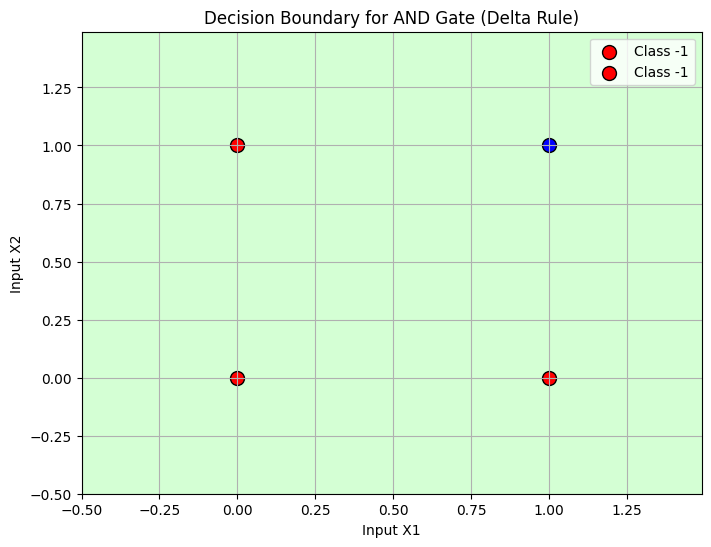

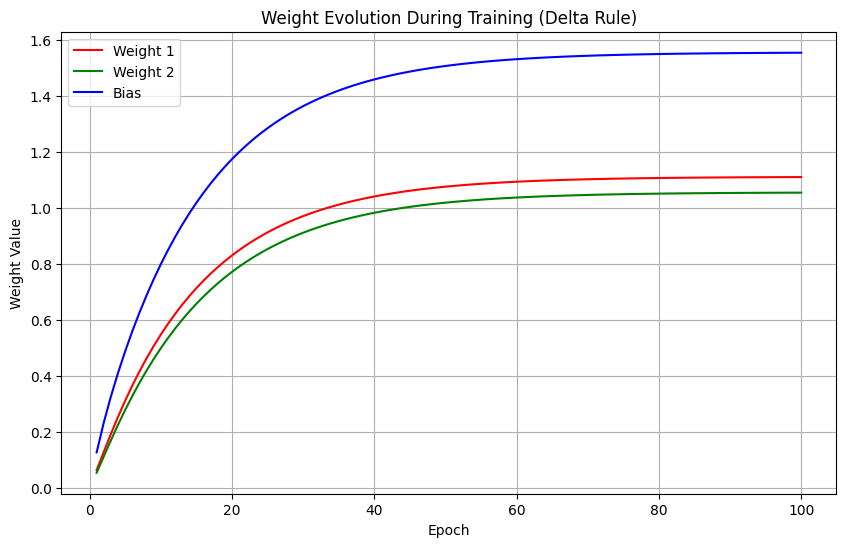

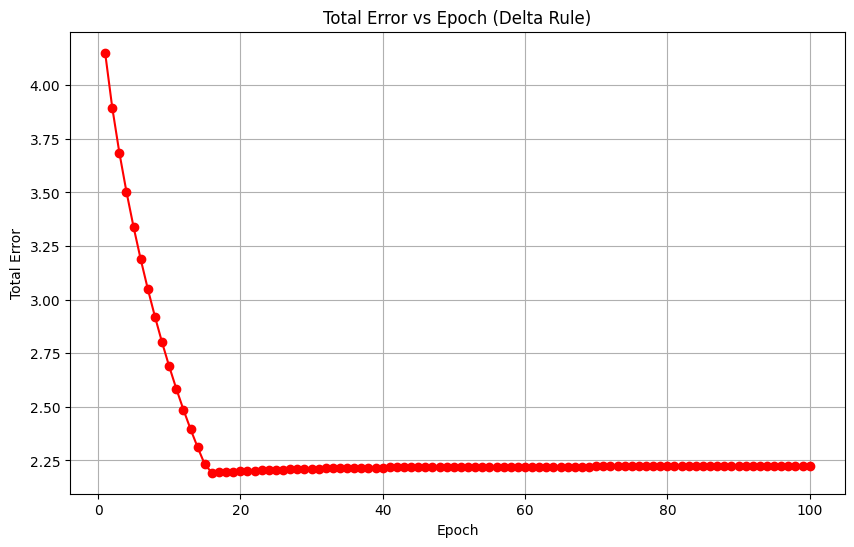

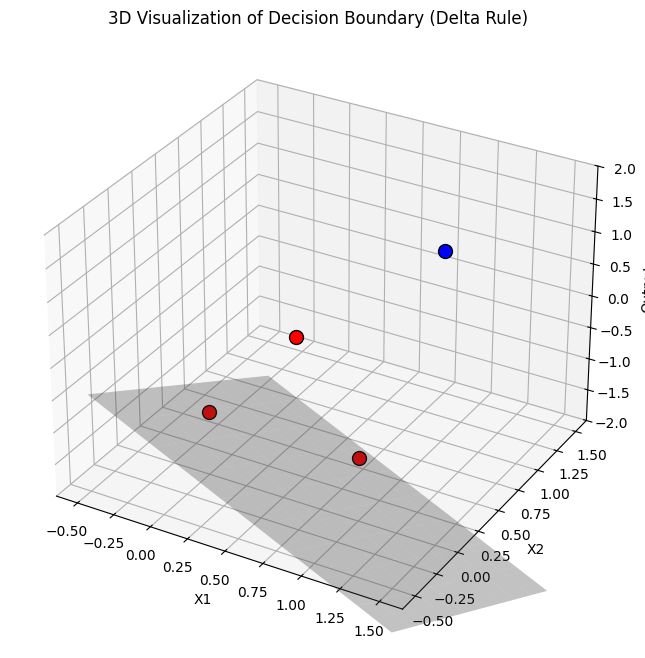

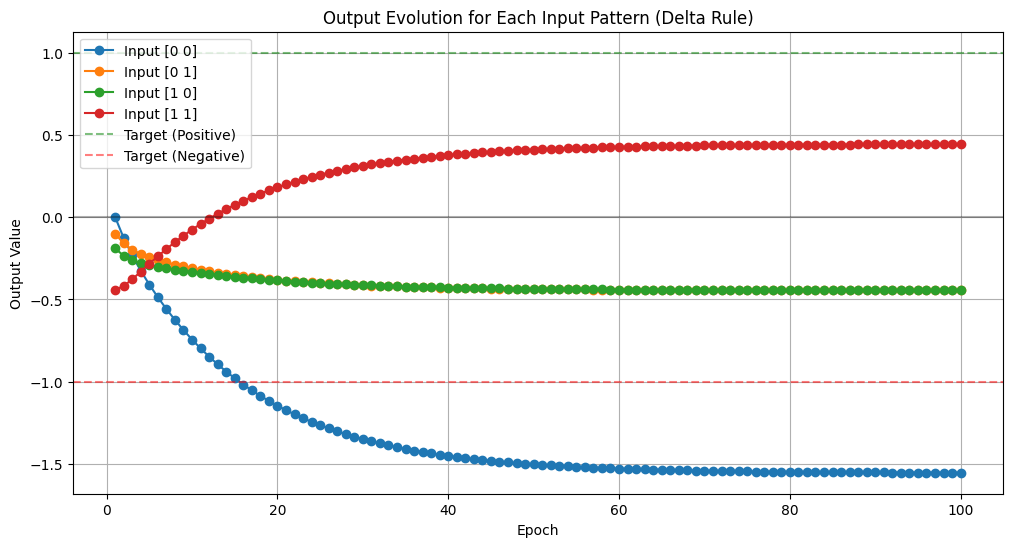

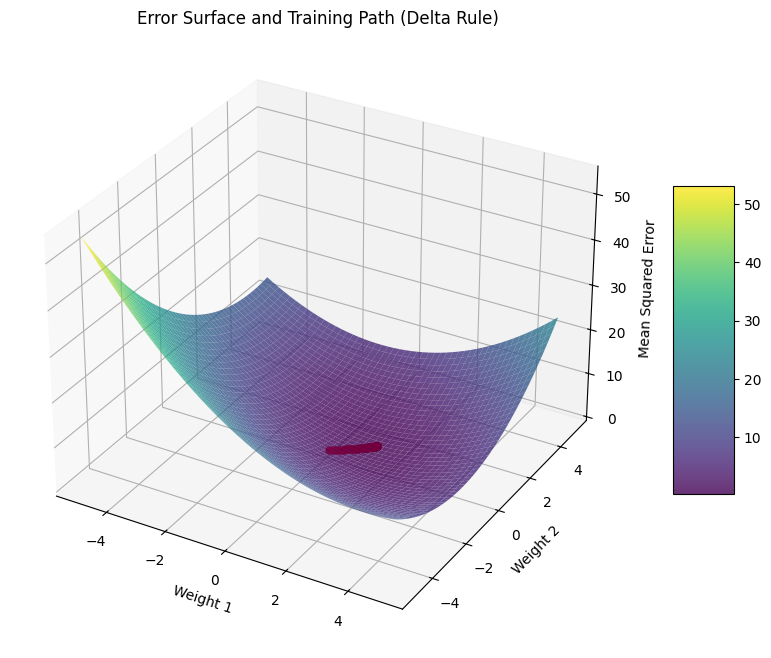


All visualizations have been generated and saved!


''

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Format floats with 1 decimal, and show trailing zeros (0.0) 设置浮点数输出格式
np.set_printoptions(precision=1, floatmode='fixed')

# Input patterns: each sample includes two inputs + a bias (-1)
inputs = np.array([
    [0, 0, -1],
    [0, 1, -1],
    [1, 0, -1],
    [1, 1, -1]
])

# Teacher signals (desired outputs): -1, -1, -1, 1 (matches the AND gate behavior)
targets = np.array([-1, -1, -1, 1])

# Initialize weights to zeros
weights = np.zeros(3)

# Learning rate
learning_rate = 0.1

# Maximum number of epochs to prevent infinite loop
max_epochs = 100

# For tracking history of weights and errors
weight_history = []
error_history = []
output_history = []

# Activation function (sign function)
def sign(n):
    return 1 if n >= 0 else -1

# start training loop
for epoch in range(max_epochs):
    total_error = 0     # accumulated error for this epoch
    epoch_outputs = []  # store outputs for this epoch
    print(f"\nEpoch {epoch + 1}")

    # iterate over all input samples
    for x, target in zip(inputs, targets):
        # Compute neuron output (dot product)（计算神经元输出 -- 加权和）
        output = np.dot(weights, x)
        epoch_outputs.append(output)
        # Compute error 误差
        error = target - output
        # Update weights using Delta Rule: w = w + learning rate * error * input 更新权重
        weights += learning_rate * error * x
        # Accumulate total error (to check convergence) 计算误差，判断收敛
        total_error += abs(error)
        # Print step details
        print(f"Input: {x}, Target: {target}, Output: {output:.1f}, Error: {error:.1f}, Updated Weights: {weights}")

    # Store history for visualization
    weight_history.append(weights.copy())
    error_history.append(total_error)
    output_history.append(epoch_outputs.copy())
    
    # Stop training if total error is zero (converged)  总误差=0 --> 收敛
    if total_error == 0:
        print("\nTraining converged.")
        break
else:
    # if max_epochs reached without convergence 达到最大轮数仍未收敛
    print("\nReached max epochs. Training may not have converged.")

# Print final results
print("\nFinal weights:", weights)

# Use trained neuron to compute outputs for all inputs
print("\nNeuron output for each input pattern:")
for x in inputs:
    output = np.dot(weights, x)     # raw output (before activation) 计算原始输出
    # Apply sign activation: output 1 if >= 0 else -1 （符号激活函数）
    activated = sign(output)
    print(f"Input: {x}, Output: {output:.1f}, Activated Output: {activated}")

# Visualization Functions

# 1. Decision Boundary Plot
def plot_decision_boundary():
    plt.figure(figsize=(8, 6))
    
    # Create a meshgrid to plot the decision boundary
    x_min, x_max = -0.5, 1.5
    y_min, y_max = -0.5, 1.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    
    # Calculate net input for each point in the meshgrid
    net_inputs = weights[0]*xx + weights[1]*yy + weights[2]
    
    # Plot the decision boundary (where net input = 0)
    plt.contour(xx, yy, net_inputs, levels=[0], colors='k', linewidths=2)
    
    # Shade the regions based on activation
    plt.contourf(xx, yy, net_inputs, levels=[-100, 0, 100], colors=['#ffaaaa', '#aaffaa'], alpha=0.5)
    
    # Plot the training points
    for i, (x, t) in enumerate(zip(inputs, targets)):
        color = 'blue' if t == 1 else 'red'
        plt.scatter(x[0], x[1], c=color, s=100, edgecolor='k', label=f"Class {t}" if i % 2 == 0 else "")
    
    plt.title('Decision Boundary for AND Gate (Delta Rule)')
    plt.xlabel('Input X1')
    plt.ylabel('Input X2')
    plt.grid(True)
    plt.legend()
    plt.savefig('delta_rule_decision_boundary.png')
    plt.show()

# 2. Weight Evolution Plot
def plot_weight_evolution():
    plt.figure(figsize=(10, 6))
    epochs = range(1, len(weight_history) + 1)
    
    plt.plot(epochs, [w[0] for w in weight_history], 'r-', label='Weight 1')
    plt.plot(epochs, [w[1] for w in weight_history], 'g-', label='Weight 2')
    plt.plot(epochs, [w[2] for w in weight_history], 'b-', label='Bias')
    
    plt.title('Weight Evolution During Training (Delta Rule)')
    plt.xlabel('Epoch')
    plt.ylabel('Weight Value')
    plt.legend()
    plt.grid(True)
    plt.savefig('delta_rule_weight_evolution.png')
    plt.show()

# 3. Error Plot
def plot_error_evolution():
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, len(error_history) + 1), error_history, 'r-o')
    plt.title('Total Error vs Epoch (Delta Rule)')
    plt.xlabel('Epoch')
    plt.ylabel('Total Error')
    plt.grid(True)
    plt.savefig('delta_rule_error_evolution.png')
    plt.show()

# 4. 3D Visualization of the Separating Plane
def plot_3d_decision_boundary():
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    
    # Plot the training points
    for x, t in zip(inputs, targets):
        color = 'blue' if t == 1 else 'red'
        ax.scatter(x[0], x[1], t, c=color, s=100, edgecolor='k')
    
    # Plot the separating plane
    xx, yy = np.meshgrid(np.linspace(-0.5, 1.5, 10), np.linspace(-0.5, 1.5, 10))
    z = (-weights[0] * xx - weights[1] * yy - weights[2]) / 1.0  # Plane equation: w1*x1 + w2*x2 + w3 = 0
    
    ax.plot_surface(xx, yy, z, alpha=0.3, color='gray')
    
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.set_zlabel('Output')
    ax.set_title('3D Visualization of Decision Boundary (Delta Rule)')
    ax.set_zlim(-2, 2)
    plt.savefig('delta_rule_3d_boundary.png')
    plt.show()

# 5. Output Evolution for Each Sample
def plot_output_evolution():
    plt.figure(figsize=(12, 6))
    epochs = range(1, len(output_history) + 1)
    
    # Plot each sample's output evolution
    for i in range(len(inputs)):
        plt.plot(epochs, [outputs[i] for outputs in output_history], marker='o', label=f"Input {inputs[i][:2]}")
    
    # Plot the target line for positive class
    plt.axhline(y=1, color='g', linestyle='--', alpha=0.5, label="Target (Positive)")
    
    # Plot the target line for negative class
    plt.axhline(y=-1, color='r', linestyle='--', alpha=0.5, label="Target (Negative)")
    
    # Plot the decision boundary at y=0
    plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
    
    plt.title('Output Evolution for Each Input Pattern (Delta Rule)')
    plt.xlabel('Epoch')
    plt.ylabel('Output Value')
    plt.legend()
    plt.grid(True)
    plt.savefig('delta_rule_output_evolution.png')
    plt.show()

# 6. Learning Surface Plot (Error Surface)
def plot_error_surface():
    # Create a range of possible weight values for w1 and w2
    w1_range = np.linspace(-5, 5, 50)
    w2_range = np.linspace(-5, 5, 50)
    w1_grid, w2_grid = np.meshgrid(w1_range, w2_range)
    
    # Use the final bias but vary w1 and w2
    w3 = weights[2]
    
    # Calculate error for each weight combination
    error_grid = np.zeros_like(w1_grid)
    for i in range(len(w1_range)):
        for j in range(len(w2_range)):
            w = np.array([w1_grid[i,j], w2_grid[i,j], w3])
            error = 0
            for x, t in zip(inputs, targets):
                output = np.dot(w, x)
                error += (t - output)**2  # Squared error
            error_grid[i,j] = error / len(inputs)
    
    # Plot the error surface
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')
    surf = ax.plot_surface(w1_grid, w2_grid, error_grid, cmap='viridis', alpha=0.8)
    
    # Mark the path of weights during training
    w1_history = [w[0] for w in weight_history]
    w2_history = [w[1] for w in weight_history]
    error_history_3d = []
    
    for w in weight_history:
        error = 0
        for x, t in zip(inputs, targets):
            output = np.dot(w, x)
            error += (t - output)**2
        error_history_3d.append(error / len(inputs))
    
    ax.plot(w1_history, w2_history, error_history_3d, 'r-o', linewidth=2, markersize=5)
    
    ax.set_xlabel('Weight 1')
    ax.set_ylabel('Weight 2')
    ax.set_zlabel('Mean Squared Error')
    ax.set_title('Error Surface and Training Path (Delta Rule)')
    
    # Add a color bar
    fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)
    
    plt.savefig('delta_rule_error_surface.png')
    plt.show()

# Generate all plots
print("\nGenerating visualizations...")
plot_decision_boundary()
plot_weight_evolution()
plot_error_evolution()
plot_3d_decision_boundary()
plot_output_evolution()
plot_error_surface()

print("\nAll visualizations have been generated and saved!")

input("\nPress ENTER to exit...")